# 1
Lemmatization is more accurate then stemming, we saw this in class when we were feeding words to these approaches in class so I just wet with lemmatization.

In [249]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

In [250]:
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/kevinpatel/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kevinpatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kevinpatel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kevinpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [251]:
pl = gutenberg.words('milton-paradise.txt')
pl

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [252]:
pl_lower = [word.lower() for word in pl]

In [253]:
sw = set(nltk.corpus.stopwords.words('english'))

In [254]:
words_remove = ['thou','thy','thee','thus','u']

In [255]:
pl_filtered = [word for word in pl_lower if word not in sw and len(word) > 2 and word not in words_remove]

In [256]:
lemmatizer = WordNetLemmatizer()
pl_lemmatized = [lemmatizer.lemmatize(word) for word in pl_filtered]

In [257]:
word_count = Counter(pl_lemmatized)
word_count

Counter({'heaven': 436,
         'god': 316,
         'shall': 283,
         'yet': 228,
         'earth': 217,
         'though': 217,
         'man': 176,
         'first': 175,
         'day': 157,
         'high': 153,
         'one': 142,
         'son': 132,
         'far': 129,
         'death': 127,
         'may': 126,
         'power': 125,
         'great': 123,
         'till': 120,
         'like': 120,
         'world': 119,
         'hell': 119,
         'thing': 116,
         'light': 116,
         'hath': 113,
         'angel': 111,
         'stood': 110,
         'whose': 109,
         'night': 109,
         'might': 107,
         'love': 106,
         'good': 105,
         'way': 103,
         'know': 102,
         'eye': 102,
         'adam': 102,
         'thought': 101,
         'hand': 101,
         'work': 98,
         'air': 98,
         'life': 98,
         'eve': 98,
         'spirit': 97,
         'soon': 91,
         'fair': 91,
         'still': 90,
      

In [258]:
top20 = word_count.most_common(20)
top20

[('heaven', 436),
 ('god', 316),
 ('shall', 283),
 ('yet', 228),
 ('earth', 217),
 ('though', 217),
 ('man', 176),
 ('first', 175),
 ('day', 157),
 ('high', 153),
 ('one', 142),
 ('son', 132),
 ('far', 129),
 ('death', 127),
 ('may', 126),
 ('power', 125),
 ('great', 123),
 ('till', 120),
 ('like', 120),
 ('world', 119)]

In [259]:
words, frequencies = zip(*top20)

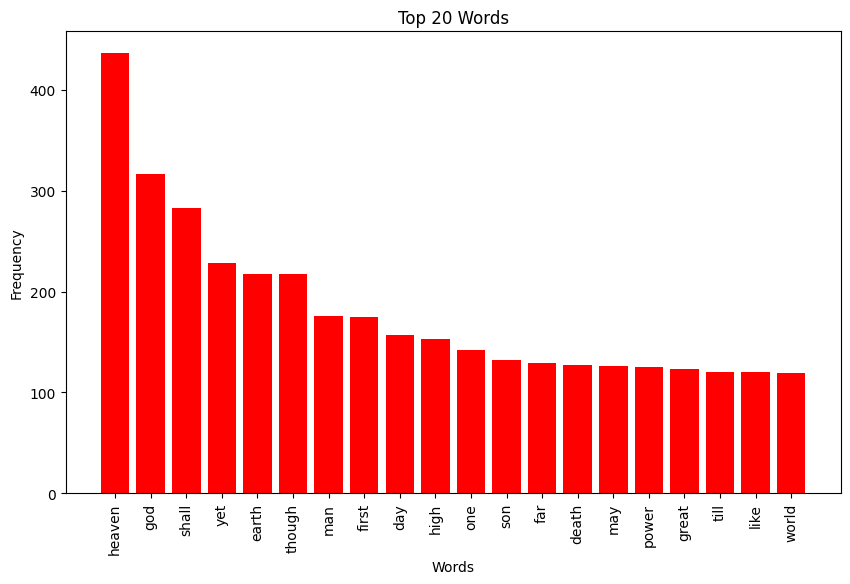

In [260]:
plt.figure(figsize=(10, 6))
plt.bar(words,frequencies,color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words')
plt.xticks(rotation=90, ha='center')
plt.show()

# 2

In [261]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kevinpatel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [262]:
paradise_lost = gutenberg.raw('milton-paradise.txt')

sentences = nltk.sent_tokenize(paradise_lost)
sia = SentimentIntensityAnalyzer()

In [263]:
sentiment_scores = [(sentence, sia.polarity_scores(sentence)['compound']) for sentence in sentences]


In [264]:
def print_sentences_with_scores(sentences):
    print("Sentences and Their Sentiment Analysis Scores:")
    for sentence, score in sentences:
        print(f"Sentence: {sentence}")
        print(f"Score: {score}\n")
sorted_sentences = sorted(sentiment_scores, key=lambda x: x[1], reverse=True)

print("Top 5 Positive Sentences:")
print_sentences_with_scores(sorted_sentences[:5])


print("Top 5 Negative Sentences:")
print_sentences_with_scores(sorted_sentences[-5:])


print("Top 5 Neutral Sentences:")
print_sentences_with_scores(sorted_sentences[len(sorted_sentences)//2-2:len(sorted_sentences)//2+3])

Top 5 Positive Sentences:
Sentences and Their Sentiment Analysis Scores:
Sentence: Beneath him with new wonder now he views, 
To all delight of human sense exposed, 
In narrow room, Nature's whole wealth, yea more, 
A Heaven on Earth:  For blissful Paradise 
Of God the garden was, by him in the east 
Of Eden planted; Eden stretched her line 
From Auran eastward to the royal towers 
Of great Seleucia, built by Grecian kings, 
Of where the sons of Eden long before 
Dwelt in Telassar:  In this pleasant soil 
His far more pleasant garden God ordained; 
Out of the fertile ground he caused to grow 
All trees of noblest kind for sight, smell, taste; 
And all amid them stood the tree of life, 
High eminent, blooming ambrosial fruit 
Of vegetable gold; and next to life, 
Our death, the tree of knowledge, grew fast by, 
Knowledge of good bought dear by knowing ill. 
Southward through Eden went a river large, 
Nor changed his course, but through the shaggy hill 
Passed underneath ingulfed; for Go

# 3
The positive sentences had a sentiment score of: .997, .9969, .9967, .9961 and .9949.
The negative sentences had a sentiment score of: -.9886, -.9889, -.9895, -.9952 and -.9959.
The neutral sentences had a sentiment score of: .128, .128, .128, .128 and .126.
By the looks of it the positive and negative sentences are a lot more dense compared to the netural sentences. The lower the sentiment socer the more negaive the sentence will be compared to the higher the sentiment score the postive the sentence will be.
